<a href="https://colab.research.google.com/github/muhiqbalalamin/DeepLearning/blob/main/Classification_Covertdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 88.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [3]:
!pip install tensorflow

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
11621/11621 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.7325 - loss: 0.6346 - val_accuracy: 0.8002 - val_loss: 0.4715
Epoch 2/10
11621/11621 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.8073 - loss: 0.4571 - val_accuracy: 0.8227 - val_loss: 0.4197
Epoch 3/10
11621/11621 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.8261 - loss: 0.4127 - val_accuracy: 0.8363 - val_loss: 0.3954
Epoch 4/10
11621/11621 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.8403 - loss: 0.3843 - val_accuracy: 0.8482 - val_loss: 0.3701
Epoch 5/10
11621/11621 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.8482 - loss: 0.3665 - val_accuracy: 0.8503 - val_loss: 0.3613
Epoch 6/10
11621/11621 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.8546 - loss: 0.3516 - val_accuracy: 0.8574 - val_loss: 0.3461
Epoch 7/10
11621/11621 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.8581 - loss: 0.3435 - val_accuracy: 0.8624 - val_loss: 0.3392
Epoch 8/10
11621/11621 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 

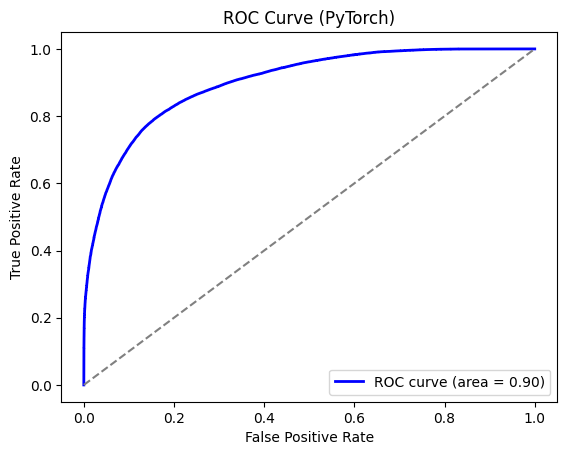

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

# Load dataset
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/02.%20Deep%20Learning/Dataset/compressed_data.csv.gz"
df = pd.read_csv(url, compression="gzip")

# Preprocessing
X = df.drop(columns=["Cover_Type"])
y = df["Cover_Type"].values.reshape(-1, 1)

encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y.flatten())
class_weights = torch.tensor(class_weights, dtype=torch.float32)

# TensorFlow MLP Model
model_tf = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(y_encoded.shape[1], activation='softmax')
])

model_tf.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_tf = model_tf.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# PyTorch MLP Model
class MLP_PyTorch(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MLP_PyTorch, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(128, output_dim)

    def forward(self, x):
        x = self.dropout(self.relu(self.bn1(self.fc1(x))))
        x = self.dropout(self.relu(self.bn2(self.fc2(x))))
        x = self.fc3(x)
        return x

X_train_torch = torch.tensor(X_train, dtype=torch.float32)
y_train_torch = torch.tensor(y_train.argmax(axis=1), dtype=torch.long)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_test_torch = torch.tensor(y_test.argmax(axis=1), dtype=torch.long)

model = MLP_PyTorch(X_train.shape[1], y_train.shape[1])
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=0.0005)

# Train PyTorch Model
num_epochs = 30
batch_size = 64

for epoch in range(num_epochs):
    model.train()
    for i in range(0, len(X_train_torch), batch_size):
        X_batch = X_train_torch[i:i+batch_size]
        y_batch = y_train_torch[i:i+batch_size]

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Evaluate TensorFlow Model
y_pred_probs_tf = model_tf.predict(X_test)
y_pred_tf = np.argmax(y_pred_probs_tf, axis=1)
y_test_actual = np.argmax(y_test, axis=1)

accuracy_tf = accuracy_score(y_test_actual, y_pred_tf)
precision_tf = precision_score(y_test_actual, y_pred_tf, average='weighted')
recall_tf = recall_score(y_test_actual, y_pred_tf, average='weighted')
f1_tf = f1_score(y_test_actual, y_pred_tf, average='weighted')
roc_auc_tf = roc_auc_score(y_test, y_pred_probs_tf, multi_class='ovr')

print("TensorFlow Model Metrics:")
print(f"Accuracy: {accuracy_tf:.4f}, Precision: {precision_tf:.4f}, Recall: {recall_tf:.4f}, F1 Score: {f1_tf:.4f}, AUC: {roc_auc_tf:.4f}")

# Evaluate PyTorch Model
model.eval()
with torch.no_grad():
    y_pred = model(X_test_torch).argmax(dim=1)

y_test_bin = (y_test_torch == 1).cpu().numpy()
y_score = torch.softmax(model(X_test_torch), dim=1)[:, 1].detach().cpu().numpy()
fpr, tpr, _ = roc_curve(y_test_bin, y_score)
roc_auc = roc_auc_score(y_test_bin, y_score)

print("PyTorch Model Classification Report:")
print(classification_report(y_test_torch, y_pred))

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (PyTorch)')
plt.legend(loc='lower right')
plt.show()

# Penjelasan metrik evaluasi:
Accuracy = (TP + TN) / (TP + TN + FP + FN)

Precision = TP / (TP + FP)

Recall = TP / (TP + FN)

F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

AUC (Area Under Curve) measures the ability of the model to distinguish between classes.

ROC (Receiver Operating Characteristic) curve plots TPR vs. FPR at different thresholds.

